In [9]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

In [5]:
image_path = '../output_videos/cropped_image.jpg'
image = cv2.imread(image_path)
image = cv2. cvtColor(image, cv2.COLOR_RGB2BGR)

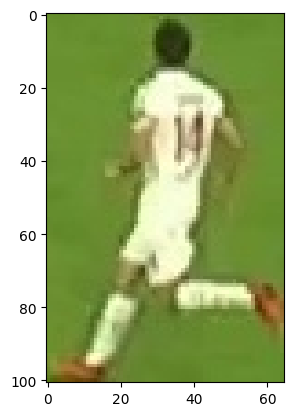

In [6]:
plt.imshow(image)

# Top half of the image

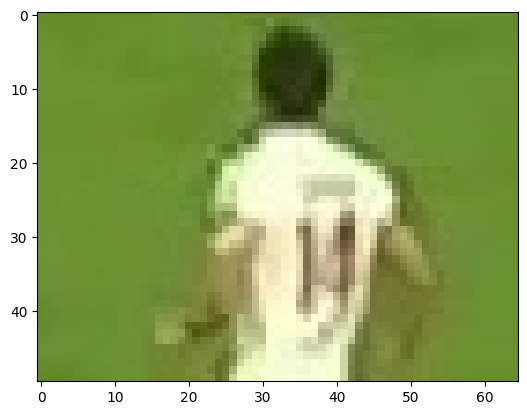

In [7]:
top_half = image[0: int(image.shape[0]/2), :]
plt.imshow(top_half)

# Cluster image into two dimension array

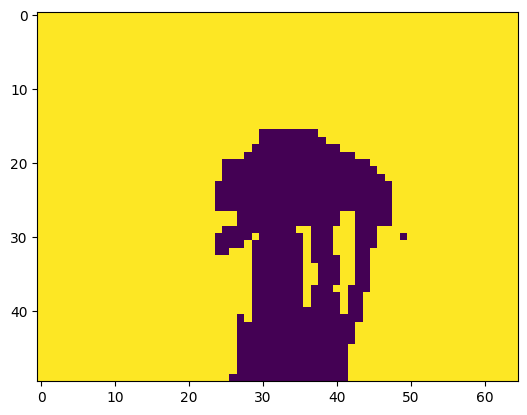

In [12]:
image_2d = top_half.reshape(-1, 3)

kmeans = KMeans(2, random_state=0).fit(image_2d)

# Get cluster labels
cluster_lables = kmeans.labels_

# reshape to be an image
clustered_image = cluster_lables.reshape(top_half.shape[0], top_half.shape[1])

plt.imshow(clustered_image)
plt.show()


In [13]:
corner_clusters = [clustered_image[0, 0], clustered_image[0, 1], clustered_image[-1, 0], clustered_image[-1, -1]]
non_player_cluster = max(set(corner_clusters), key=corner_clusters.count)
print(non_player_cluster)


1


In [14]:
player_cluster = 1 - non_player_cluster
print(player_cluster)

0


In [18]:
kmeans.cluster_centers_[player_cluster]

array([228.21715328, 228.74087591, 185.87043796])